# Importing the Libraries

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defining method

In [297]:
def preparing_table(df_total, years):
    df_total = df_total.replace(": c", -1)
    df_total = df_total.replace(": ", -1)
    df_total = df_total.replace(":", -1)

    for i in years:
        df_total = df_total.rename(columns={i + ' ' : i})
        
    df_tones = df_total[years]
    df_tones = df_tones.apply(pd.to_numeric, errors='coerce')
    
    row_means = df_tones.apply(lambda row: row[row > 0].mean(), axis=1)
    df_total['Mean'] = row_means
    
    cols =[]
    cols = [x for x in years]
    cols.append('Mean')
    
    for index, row in df_total.iterrows():
        # Identify columns with -1 in the current row
        columns_with_minus_one = row.index[row.eq(-1)]

        # Replace -1 with the corresponding values from the 'Mean' column for the identified columns
        df_total.loc[index, columns_with_minus_one] = row['Mean']

    # Convert numeric columns to appropriate data types
    #numeric_columns = rail_total.columns.difference(["geo\\time", "Mean"]).tolist()
    df_total[cols] = df_total[cols].apply(pd.to_numeric, errors="coerce")

    # Round numeric columns to 2 decimals
    df_total[cols] = df_total[cols].round(2)
    
    return df_total

# Reading the dataset

In [298]:
countries = pd.read_csv('data/countries.csv')
countries = countries.rename(columns={"Short": "country"})

In [299]:
years = []
for i in range(2008,2023):
    years.append(i)
    
years = [str(x) for x in years]
#years

In [394]:
products = pd.read_csv('data/products.csv')
products['Code'] = products['Code'].str.strip()
products = products.drop([20])
products.to_excel("output/products.xlsx")

## Rail

In [301]:
rail = pd.read_csv('data/rail_total_per_product.tsv', sep = r'\t|,')
rail = rail.rename(columns={"geo\TIME_PERIOD": "country"})
rail = rail.rename(columns={"nst07": "Product"})
rail_total = rail
#rail_total = rail[(rail['unit'] == 'THS_T') & (rail['Product'] == 'TOTAL')]

rail_all = preparing_table(rail, years)
rail_total = rail_all[(rail_all['unit'] == 'THS_T') & (rail_all['Product'] == 'TOTAL')]

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\1589836236.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rail = pd.read_csv('data/rail_total_per_product.tsv', sep = r'\t|,')


## Road

In [302]:
road = pd.read_csv('data/road_total_per_product.tsv', sep = r'\t|,')
road = road.rename(columns={"geo\TIME_PERIOD": "country"})
road = road.rename(columns={"nst07": "Product"})
road_total = road

road_all = preparing_table(road_total, years)
road_total = road_all[(road_all['Product'] == 'TOTAL')]

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\1401180923.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  road = pd.read_csv('data/road_total_per_product.tsv', sep = r'\t|,')


### Inland

In [303]:
inland = pd.read_csv('data/inland_total_per_product.tsv', sep = r'\t|,')

inland = inland.rename(columns={"geo\TIME_PERIOD": "country"})
inland = inland.rename(columns={"nst07": "Product"})
inland_all = inland
#inland_total = inland[(inland['unit'] == 'THS_T')(inland['tra_cov'] == 'TOTAL')]

inland_all = preparing_table(inland_all, years)
inland_total = inland_all[(inland_all['Product'] == 'TOTAL')]

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\2840499501.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  inland = pd.read_csv('data/inland_total_per_product.tsv', sep = r'\t|,')


### Maritime

In [304]:
maritime = pd.read_csv('data/mar_go_aa_page_tabular.tsv', sep = r'\t|,')

maritime = maritime.rename(columns={"rep_mar\TIME_PERIOD": "country"})
#maritime = maritime.rename(columns={"nst07": "Product"})
maritime_total = maritime[(maritime['unit'] == 'THS_T')]

maritime_total = preparing_table(maritime_total, years)
maritime_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\1137462683.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  maritime = pd.read_csv('data/mar_go_aa_page_tabular.tsv', sep = r'\t|,')


,freq,direct,unit,country,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,TOTAL,THS_T,BE,161621,171026,165557,179381,174181,173824,...,237852,241459,253543,257865,270317,277783,268675.0,288827.0,288229.0,249658.07
1,A,TOTAL,THS_T,BG,27061.466667,27061.466667,27061.466667,27061.466667,20192,20390,...,27235,27166,28685,30953,27868,30997,25258.0,25576.0,30731.0,27061.47
2,A,TOTAL,THS_T,CY,7622.533333,7622.533333,7622.533333,7622.533333,7622.533333,7220,...,7186,10268,10259,7860,6948,7428,7473.0,6985.0,8235.0,7622.53


### Air

In [305]:
air = pd.read_csv('data/avia_gooc_page_tabular.tsv', sep = r'\t|,')

air = air.rename(columns={"geo\TIME_PERIOD": "country"})
#air = air.rename(columns={"nst07": "Product"})
#air_total = air[(air['unit'] == 'THS_T')]
air_total = air

air_total = preparing_table(air_total, years)
air_total[years] = air_total[years] / 1000
air_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\2970134492.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  air = pd.read_csv('data/avia_gooc_page_tabular.tsv', sep = r'\t|,')


,freq,unit,tra_meas,schedule,tra_cov,country,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,T,FRM_LD_NLD,TOT,TOTAL,AT,206643,206.2210,202.6420,236.6330,...,217.7850,216.6210,223.4212,227.6428,237.7006,228.2234,165.0132,194.8202,188.1822,210557.04
1,A,T,FRM_LD_NLD,TOT,TOTAL,BA,11518.7,11.5187,11.5187,11.5187,...,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11518.70
2,A,T,FRM_LD_NLD,TOT,TOTAL,BE,1203245,1071.3460,836.4090,953.5823,...,1014.5856,1126.2341,1088.7340,1251.1730,1416.4280,1397.5130,1584.6400,2083.6320,1729.3320,1230573.24


# Question 2.2

### Defining Transports List

### EU-27 | Rail

In [306]:
rail_EU = countries.join(rail_total.set_index('country'), on='country')
rail_EU = rail_EU.fillna(0)

sum_rail_EU = rail_EU[years].sum().values.tolist()
sum_rail_EU

[1600883.91,
 1296537.67,
 1426304.27,
 1525042.67,
 1461841.75,
 1498099.35,
 1501738.02,
 1500812.02,
 1478573.35,
 1525842.35,
 1547294.35,
 1513403.35,
 1418041.75,
 1546649.75,
 1473582.85]

### EU-27 | Road

In [307]:
road_EU = countries.join(road_total.set_index('country'), on='country')
road_EU = road_EU.fillna(0)

sum_road_EU = road_EU[years].sum().values.tolist()

### EU-27 | Inland

In [308]:
inland_EU = countries.join(inland_total.set_index('country'), on='country')
inland_EU = inland_EU.fillna(0)

sum_inland_EU = inland_EU[years].sum().values.tolist()

### EU-27 | Maritime

In [309]:
maritime_EU = countries.join(maritime_total.set_index('country'), on='country')
maritime_EU = maritime_EU.fillna(0)
maritime_EU = maritime_EU[years] / 1000
sum_maritime_EU = maritime_EU[years].sum().values.tolist()

### EU-27 | Air

In [310]:
air_EU = countries.join(air_total.set_index('country'), on='country')
air_EU = air_EU.fillna(0)

sum_air_EU = air_EU[years].sum().values.tolist()

### Creating Dataframe

In [311]:
df = pd.DataFrame({'Years': years,
                   'Rail': sum_rail_EU,
                   'Road': sum_road_EU,
                   'Inland': sum_inland_EU,
                   'Maritime': sum_maritime_EU,
                  'Air': sum_air_EU})

df = df.set_index('Years')
df

,Rail,Road,Inland,Maritime,Air
Years,,,,,
2008,1600883.91,15396187.0,889124.0,3383.545,11655.5441
2009,1296537.67,13771107.0,756119.0,2965.925,10137.8293
2010,1426304.27,13540791.0,917579.0,3159.121,11757.4437
2011,1525042.67,13526293.0,899478.0,3266.566,12209.1888
2012,1461841.75,12510665.0,917967.0,3241.803,11906.6937
2013,1498099.35,12437175.0,923343.0,3215.905,12039.4213
2014,1501738.02,12657416.0,935342.0,3287.209,13110.2191
2015,1500812.02,12673345.0,914795.0,3343.755,13303.8295
2016,1478573.35,12825667.0,924165.0,3376.703,13794.0548


## Stacked Line Chart

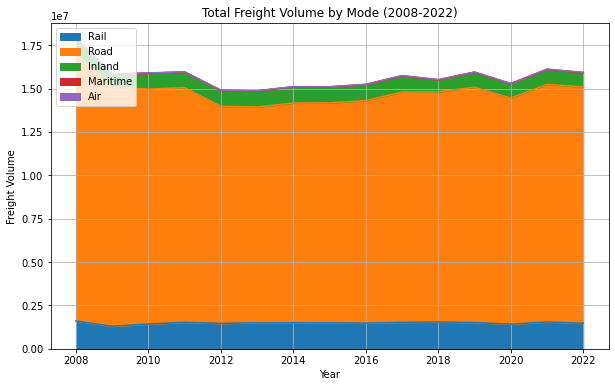

In [312]:
df['Total'] = df.sum(axis=1)
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Total Freight Volume by Mode (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Freight Volume')
plt.legend(loc='upper left')
plt.grid(True)

plt.savefig('Analysis_per_transport_EU/Stacked_Line_Chart.png')

plt.show()

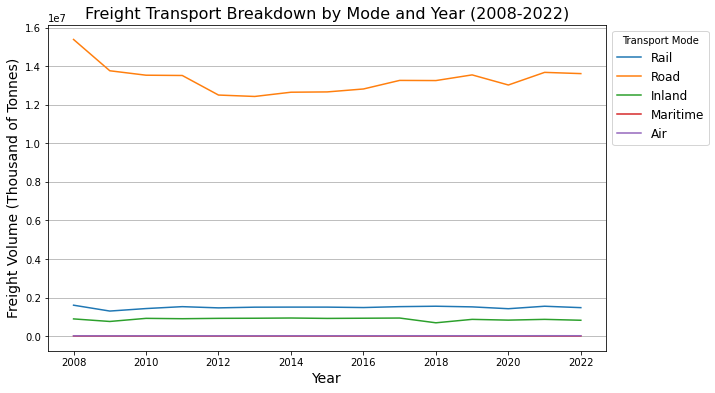

In [313]:
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Line_Chart.png')

# Show the plot
plt.show()

## Rail

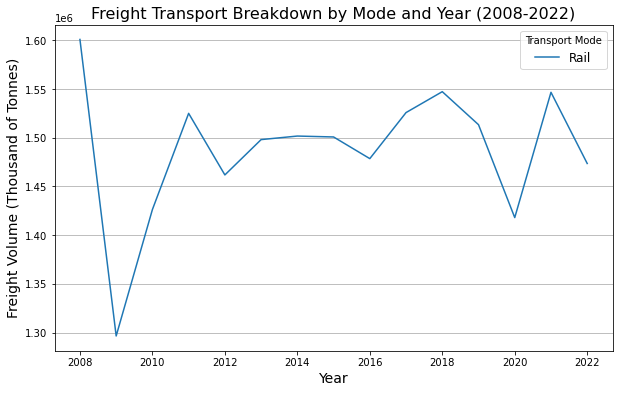

In [314]:
df['Rail'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Rail.png')

# Show the plot
plt.show()

## Road

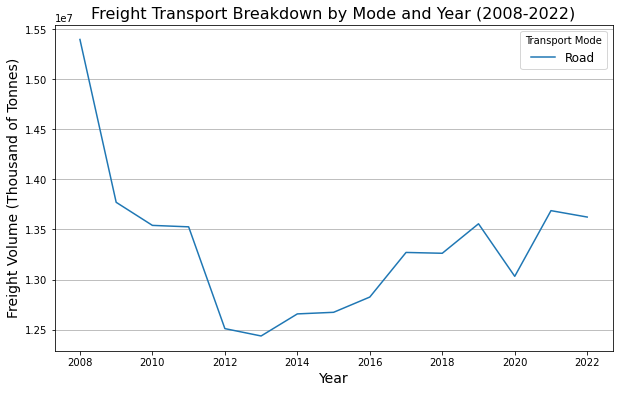

In [315]:
df['Road'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Road.png')

# Show the plot
plt.show()

## Inland

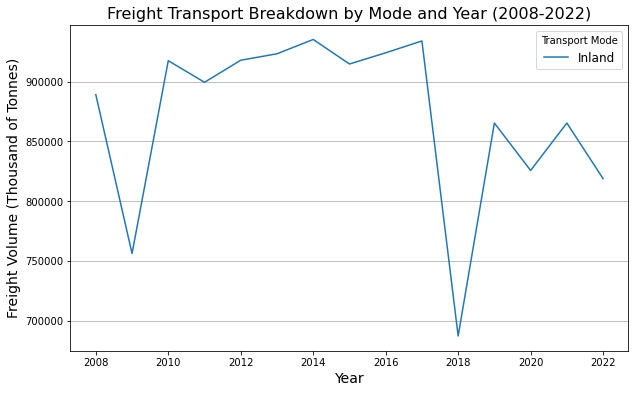

In [316]:
df['Inland'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Inland.png')

# Show the plot
plt.show()

## Maritime

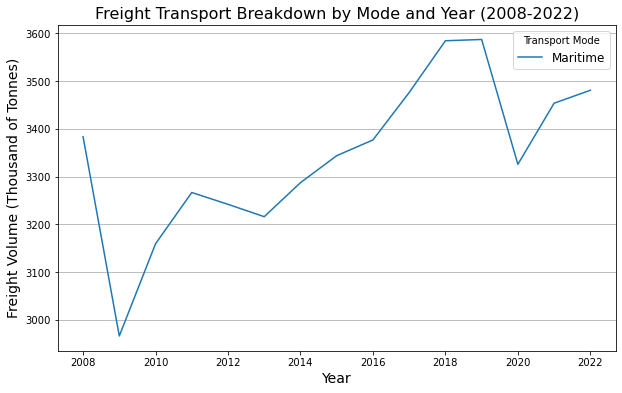

In [317]:
df['Maritime'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Maritime.png')

# Show the plot
plt.show()

## Air

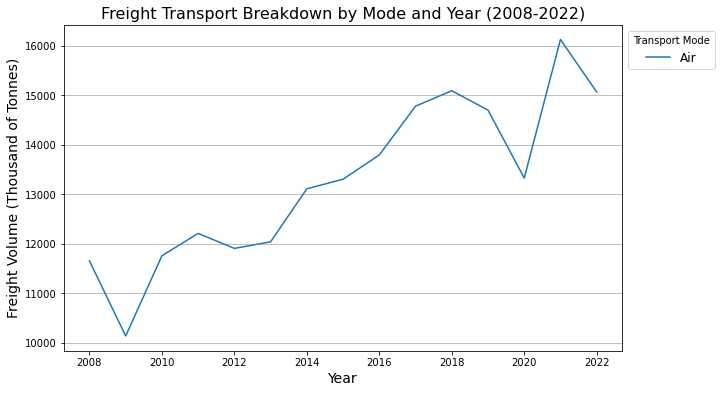

In [318]:
df['Air'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Air.png')

# Show the plot
plt.show()

## Grouped Bar Chart for Each Year Across Transport Modes

In [319]:
'''
df['Rail'] = df['Rail'] / df['Total']
df['Road'] = df['Road'] / df['Total']
df['Inland'] = df['Inland'] / df['Total']
df['Maritime'] = df['Maritime'] / df['Total']
df['Air'] = df['Air'] / df['Total']
'''

"\ndf['Rail'] = df['Rail'] / df['Total']\ndf['Road'] = df['Road'] / df['Total']\ndf['Inland'] = df['Inland'] / df['Total']\ndf['Maritime'] = df['Maritime'] / df['Total']\ndf['Air'] = df['Air'] / df['Total']\n"

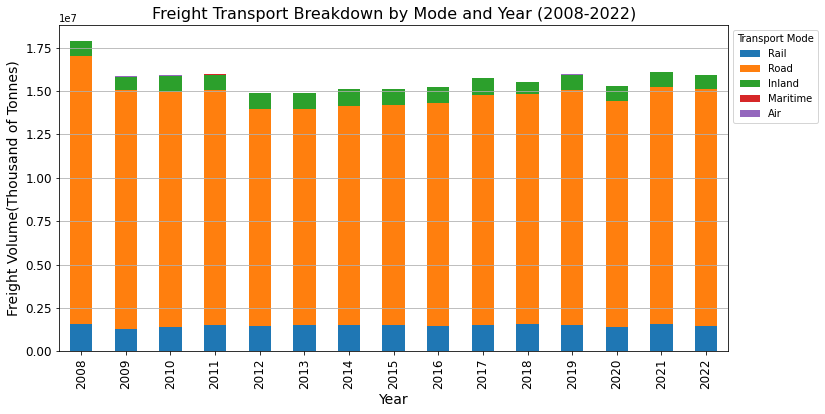

In [320]:
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume(Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1))
plt.grid(axis='y')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Analysis_per_transport_EU/Stacked_Column_Chart.png')

plt.show()

## Pie Chart per Year

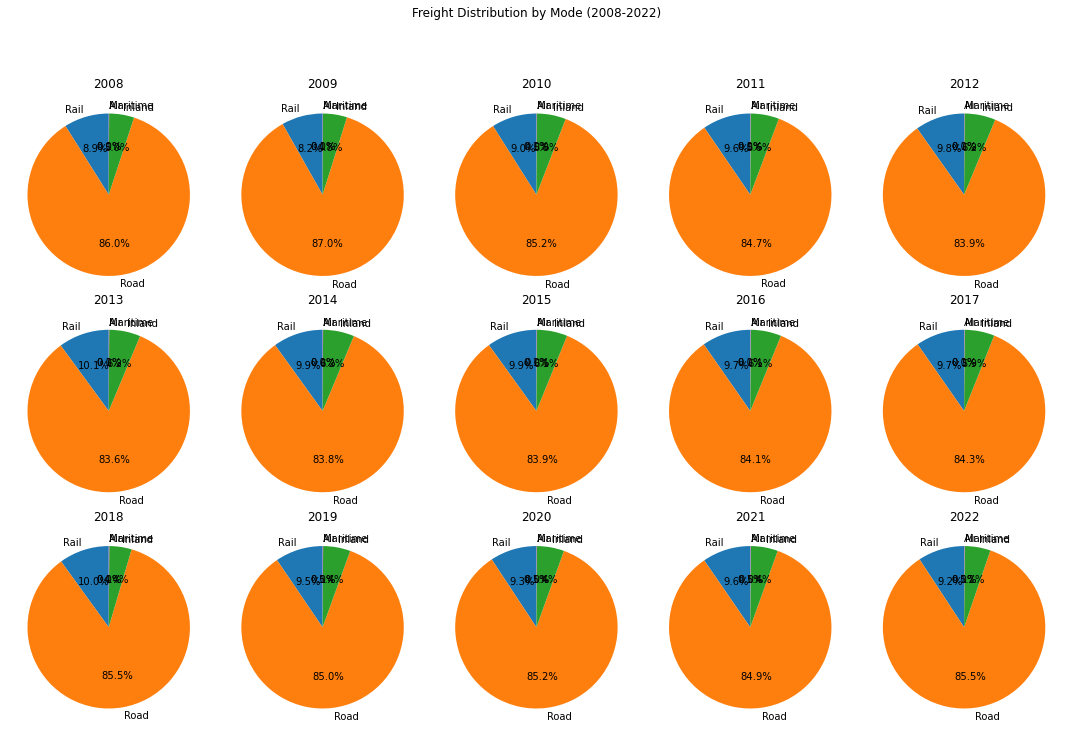

In [321]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Freight Distribution by Mode (2008-2022)', y=1.02)

for i, ax in enumerate(axes.flatten()):
    if i < len(df):
        year = df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].index[i]
        data_for_year = df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].loc[year]
        
        ax.pie(data_for_year, labels=data_for_year.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{year}')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('Analysis_per_transport_EU/Pie_Per_Year.png')

#plt.show()

# Question 3

### Rail Products

In [322]:
def analysis_per_product(all):
    products = countries.join(all.set_index('country'), on='country')
    products = products.fillna(0)
    df = products.groupby('Product').sum().drop(0)
    df = df.drop('TOTAL')
    df.reset_index(inplace=True)
    df = df.drop(columns = ['Product'])
    return df

In [370]:
def plot_prod(products, title):
    #products.iloc[0:].plot(figsize=(10, 6))
    plt.figure(figsize=(10, 6))
    plt.plot(years, products[years].iloc[0])
    plt.plot(years, products[years].iloc[1])
    plt.plot(years, products[years].iloc[2])
    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
    plt.legend(products["Transport"] ,title='Product', bbox_to_anchor=(1, 1), fontsize=12)
    plt.grid(axis='y')

    # Save the figure
    #plt.savefig('ou/Maritime.png')

    # Show the plot
    return plt

In [324]:
products_list = products['Code'].values.tolist()

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\2141418656.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = products.groupby('Product').sum().drop(0)


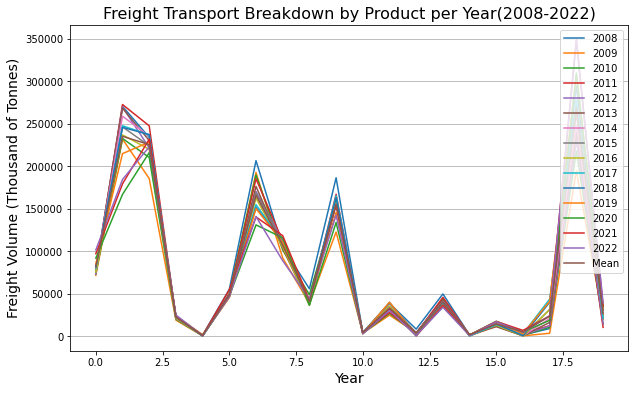

In [325]:
rail_prod = analysis_per_product(rail_all)
plt  = plot_prod(rail_prod)
plt.show()

In [326]:
rail_prod["Transport"] = "Rail"

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\2141418656.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = products.groupby('Product').sum().drop(0)


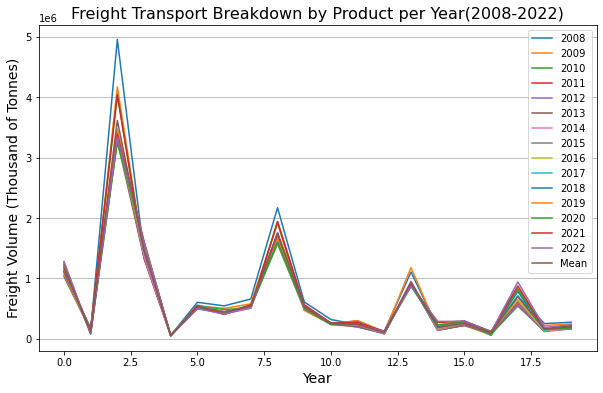

In [327]:
road_prod = analysis_per_product(road_all)
plt  = plot_prod(road_prod)
plt.show()

In [330]:
road_prod["Transport"] = "Road"

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\2141418656.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = products.groupby('Product').sum().drop(0)


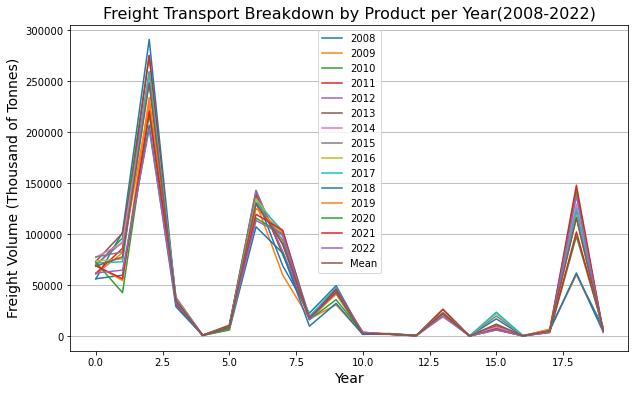

In [328]:
inland_prod = analysis_per_product(inland_all)
plt  = plot_prod(inland_prod)
plt.show()

In [331]:
inland_prod["Transport"] = "Inland"

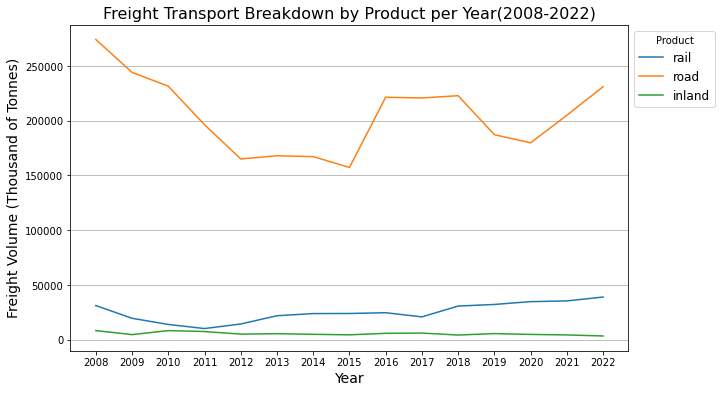

In [361]:
plt  = plot_prod(total_prod.loc[number])
plt.show()

In [395]:
total_prod.head(1)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Transport,Product
0,77969.29,71547.0,73458.62,76312.62,72985.5,77628.5,79348.5,75633.5,75375.5,80066.5,82354.5,85091.5,91701.5,96955.5,101407.43,rail,GT01


In [379]:
rail_prod["Product"] = products['Code']
road_prod["Product"] = products['Code']
inland_prod["Product"] = products['Code']

In [426]:
total_prod = pd.concat([rail_prod, road_prod, inland_prod])
for number in range(20):
    title = str(number+1) + ". " + products['Product'].iloc[number]
    plt  = plot_prod(total_prod.loc[number], title)
    path = 'Question_3/product_' + str(number + 1) + '.png'
    plt.savefig(path)
    plt.close()

In [409]:
totals = total_prod[years].apply(pd.to_numeric, errors='coerce')
row_sum = totals.apply(lambda row: row[row > 0].sum(), axis=1)
totals['Sum'] = row_sum
totals.reset_index(inplace=True)

In [421]:
prod_t = totals.groupby('index').sum()
prod_t = prod_t.sort_values(by = 'Sum', ascending = False)
prod_t.reset_index(inplace=True)
for i in range(20):
    prod_t['index'].iloc[i] = 'GT' + str(prod_t['index'].iloc[i])
prod_t.to_excel("output/15years_per_product.xlsx")

C:\Users\nikol\AppData\Local\Temp\ipykernel_3100\3798639999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_t['index'].iloc[i] = 'GT' + str(prod_t['index'].iloc[i])


In [424]:
prod_t[['index','Sum']].sort_values(by="Sum", ascending = False).to_excel("output/Sum_per_product.xlsx")

In [399]:
asd = total_prod.drop(columns = ['Mean'])
asd.to_excel("output/table_q3.xlsx")

In [393]:
#total_prod = total_prod.drop(columns=['Mean'])
z = pd.pivot_table(total_prod,  index=['Product'], columns=['Transport'], aggfunc="sum")
z.to_excel("output/question_3.xlsx")